<a href="https://colab.research.google.com/github/ChinnuMariya/apple-stock-prediction-lstm/blob/main/apple_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Apple Stock Price Prediction using LSTM (Long Short-Term Memory)
### A Deep Learning Approach for Time Series Forecasting


In [2]:
!pip install yfinance


In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
import yfinance as yf

# Fetch Apple stock data from Yahoo Finance
df = yf.download('AAPL', start='2015-01-01', end='2023-12-31')

# Show first few rows
print(df.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.288580  24.757334  23.848706  24.746226  212818400
2015-01-05  23.604332  24.137513  23.417720  24.057535  257142000
2015-01-06  23.606558  23.866483  23.244438  23.668762  263188400
2015-01-07  23.937572  24.037543  23.704305  23.815385  160423600
2015-01-08  24.857304  24.915065  24.148618  24.266363  237458000


In [5]:
df.columns = df.columns.get_level_values(0)


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Use just the 'Close' price
data = df['Close'].values.reshape(-1, 1)

# Normalize the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [7]:
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for LSTM: (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [8]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the model
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))  # Predicting the next closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - loss: 0.0163 - val_loss: 0.0030
Epoch 2/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 3/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - loss: 0.0019 - val_loss: 0.0094
Epoch 4/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - loss: 0.0023 - val_loss: 0.0042
Epoch 5/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - loss: 0.0017 - val_loss: 0.0101
Epoch 7/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 8/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0014 - val_loss: 0.0073
Epoch 9/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 10/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 11/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 12/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step 

In [10]:
# Predict on test data
predicted_stock_price = model.predict(X_test)

# Inverse scale to original price values
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step


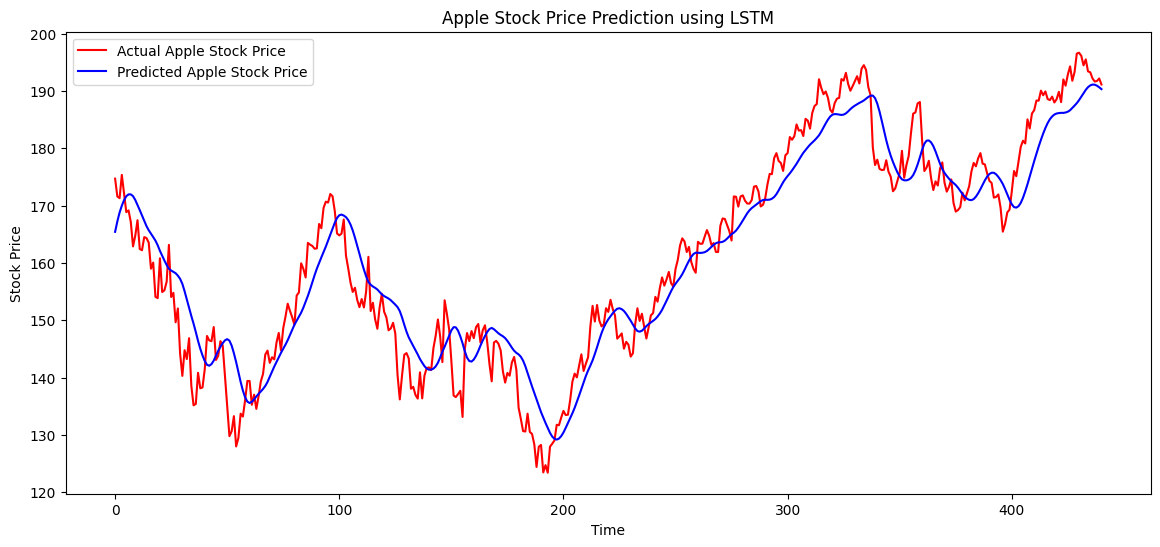

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(real_stock_price, color='red', label='Actual Apple Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 5.7540
